In [ ]:
import os

img_dir = "/content/drive/MyDrive/Colab Notebooks/Projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train"
mask_dir = "/content/drive/MyDrive/Colab Notebooks/Projet 8/P8_Cityscapes_gtFine_trainvaltest/gtFine8/train"

pairs = []
for ville in os.listdir(img_dir):
    for img_file in os.listdir(os.path.join(img_dir, ville)):
        if img_file.endswith("_leftImg8bit.png"):
            img_path = os.path.join(img_dir, ville, img_file)
            # Pour le mask : remplace le suffixe
            mask_file = img_file.replace("_leftImg8bit.png", "_gtFine_labelIds.png")
            mask_path = os.path.join(mask_dir, ville, mask_file)
            if os.path.exists(mask_path):
                pairs.append((img_path, mask_path))
            else:
                print(f"WARNING: mask not found for {img_path}")

print(f"Nombre de paires trouvées : {len(pairs)}")

Nombre de paires trouvées : 2975


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def scroll_pairs(numero):
  img_path, mask_path = pairs[numero]
  img = Image.open(img_path)
  mask = Image.open(mask_path)

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.title('Image RGB')
  plt.imshow(img)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('Mask 8 classes')
  plt.imshow(mask, cmap='nipy_spectral')
  plt.axis('off')
  plt.show()


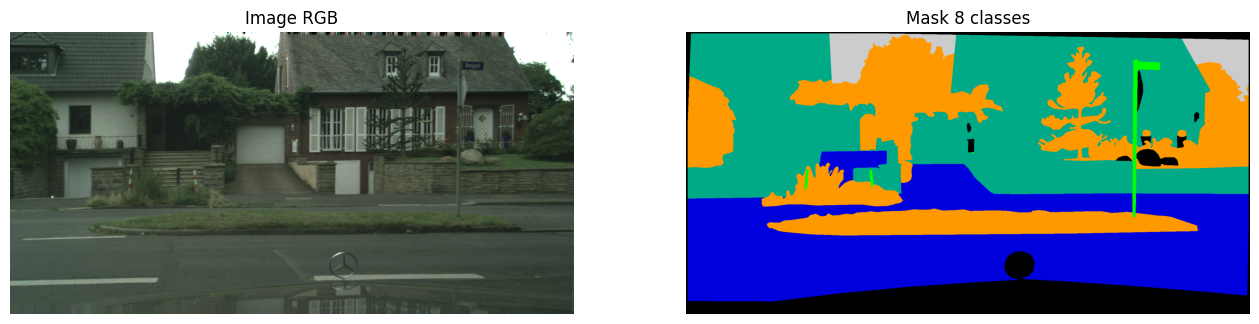

In [ ]:
scroll_pairs(0)

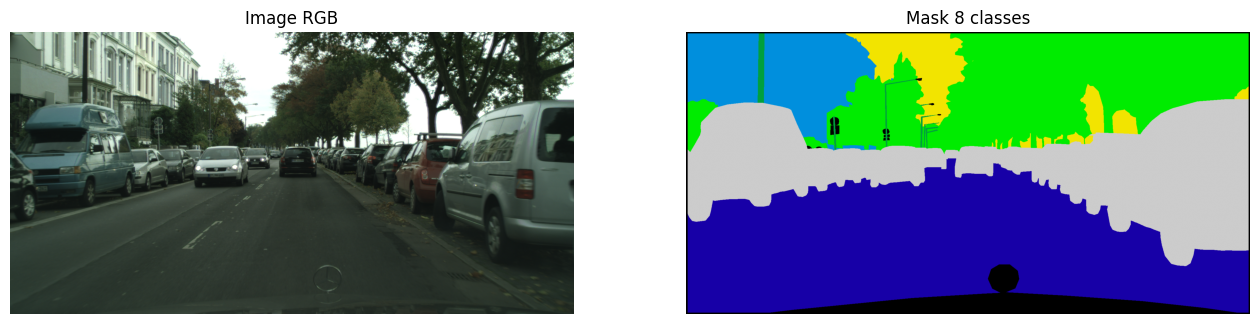

In [ ]:
scroll_pairs(1000)

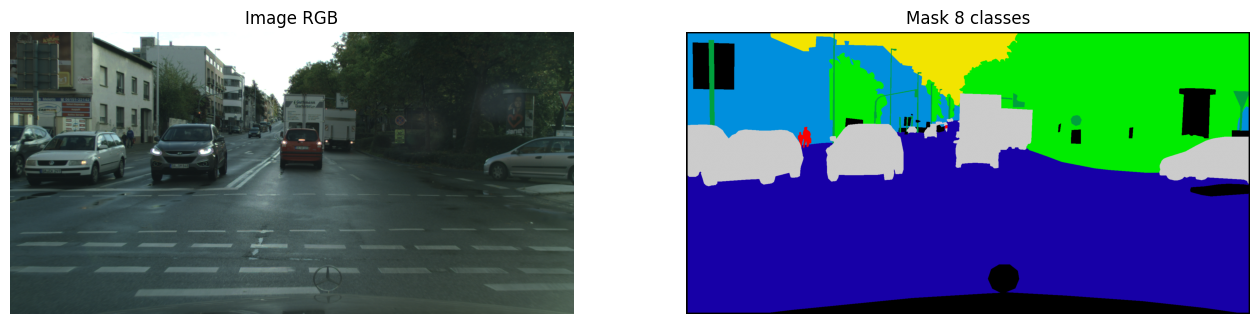

In [ ]:
scroll_pairs(100)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(pairs, columns=['img_path', 'mask_path'])

In [ ]:
df.head()

,img_path,mask_path
0,/content/drive/MyDrive/Colab Notebooks/Projet ...,/content/drive/MyDrive/Colab Notebooks/Projet ...
1,/content/drive/MyDrive/Colab Notebooks/Projet ...,/content/drive/MyDrive/Colab Notebooks/Projet ...
2,/content/drive/MyDrive/Colab Notebooks/Projet ...,/content/drive/MyDrive/Colab Notebooks/Projet ...
3,/content/drive/MyDrive/Colab Notebooks/Projet ...,/content/drive/MyDrive/Colab Notebooks/Projet ...
4,/content/drive/MyDrive/Colab Notebooks/Projet ...,/content/drive/MyDrive/Colab Notebooks/Projet ...


Redimensionner en divisant par 4

on prend resize d'open cv même pour le mask mais attention à la méthode d'interpolation pour pas inventer de nouvelles catégories

https://www.geeksforgeeks.org/image-processing-opencv-vs-pil/

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

Pour les masques de segmentation (annotations “labels”)
Il ne faut JAMAIS utiliser une interpolation “continue” (comme bilinear ou bicubic) sur un masque de labels :
→ Ces méthodes inventeraient des valeurs intermédiaires, donc des “fausses” classes, par interpolation mathématique (genre 2.7, 5.2, etc.).

Il faut utiliser une interpolation “discrète” qui conserve les entiers des classes, donc :

cv2.INTER_NEAREST (nearest neighbor, “plus proche voisin”)
→ Cela garantit que chaque pixel du mask agrandi/réduit garde exactement la valeur d’une classe existante, sans mélange.

Pour les images RGB (photos)
Tu peux utiliser cv2.INTER_LINEAR (bilinear) ou cv2.INTER_AREA (pour réduire), ou même cv2.INTER_CUBIC (pour agrandir), car les valeurs de pixels sont continues et peuvent être “moyennées”.

Non, ce n’est pas problématique, c’est même la seule bonne pratique en vision par ordinateur pour la segmentation sémantique.

Pourquoi utiliser une interpolation différente pour l’image et pour le mask ?
Les images RGB :
→ Ce sont des données “visuelles continues”.
→ On peut “moyenner” ou “interpoler” les couleurs entre deux pixels sans aucun problème (c’est ce qui rend l’image agréable à l’œil même agrandie ou réduite).

Les masques de segmentation :
→ Ce sont des “données discrètes”, c’est-à-dire des entiers qui codent une catégorie :
0 = route, 1 = trottoir, 2 = voiture, etc.
→ Si tu “interpolais” (ex: bilinear), tu obtiendrais des pixels ayant des valeurs impossibles (3.5, 7.2...), donc des classes qui n’existent pas : c’est une erreur fondamentale !

Voir le github qubvel segmentation (examples)
Le but du data generator c'est de faire des batches

data augmentation : quand c de la transformation géométrique il faut faire pareil sur le mask